In [243]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [244]:
data_path = 'languageID'
alpha = 1/2 
K_l = 3
num_sample = {'e': 10, 's': 10, 'j' : 10}
prior = {}
for label in num_sample:
    cnt = num_sample[label]
    prior[label] = (cnt + alpha)/ (sum(num_sample.values()) + (K_l*alpha))
prior

{'e': 0.3333333333333333, 's': 0.3333333333333333, 'j': 0.3333333333333333}

In [245]:
lang = []
dict_list = []
for label in ['e','s','j']:
    alpha_cnt = {}
    for i in range (0, 10):
        name = label + (str(i)) + ".txt"
        file_path = os.path.join('languageID', name)
        with open(file_path,'r') as f:
            content = f.read()
            for char in content:
                if char.isalpha() or char.isspace():
                    if char in alpha_cnt:
                        alpha_cnt[char] += 1
                    else:
                        alpha_cnt[char] = 1
    #sort keys
    if '\n' in alpha_cnt:
        del alpha_cnt['\n']

    sorted_dict = {key: alpha_cnt[key] for key in sorted(alpha_cnt.keys())}
    #finding theta
    deno = sum(sorted_dict.values()) + alpha*len(sorted_dict)
    theta = []
    for val in sorted_dict:
        i = (sorted_dict[val] + alpha)/ deno
        theta.append(i)
    dict_list.append(sorted_dict)
    lang.append(theta)


In [246]:
dict_list[2]

{' ': 1766,
 'a': 1885,
 'b': 155,
 'c': 78,
 'd': 246,
 'e': 861,
 'f': 55,
 'g': 200,
 'h': 454,
 'i': 1388,
 'j': 33,
 'k': 821,
 'l': 20,
 'm': 569,
 'n': 811,
 'o': 1304,
 'p': 12,
 'q': 1,
 'r': 612,
 's': 603,
 't': 815,
 'u': 1010,
 'v': 3,
 'w': 282,
 'y': 202,
 'z': 110}

In [247]:
lang[0]

[0.1792499586981662,
 0.0601685114819098,
 0.011134974392863043,
 0.021509995043779945,
 0.021972575582355856,
 0.1053692383941847,
 0.018932760614571286,
 0.017478936064761277,
 0.047216256401784236,
 0.055410540227986124,
 0.001420783082768875,
 0.0037336857756484387,
 0.028977366595076822,
 0.020518751032545846,
 0.057921691723112505,
 0.06446390219725756,
 0.01675202378985627,
 0.0005617049396993227,
 0.053824549810011564,
 0.06618205848339666,
 0.08012555757475633,
 0.026664463902197257,
 0.009284652238559392,
 0.015496448042293078,
 0.001156451346439782,
 0.013844374690236246,
 0.0006277878737815959]

In [248]:
#s
lang[1]

[0.16826493170115014,
 0.10456045141993771,
 0.008232863618143134,
 0.03752582405722919,
 0.039745922111559924,
 0.1138108599796491,
 0.00860287996053159,
 0.0071844839813758445,
 0.0045327001942585795,
 0.049859702136844375,
 0.006629459467793161,
 0.0002775122567913416,
 0.052943171656748174,
 0.02580863988159477,
 0.054176559464709693,
 0.07249236841293824,
 0.02426690512164287,
 0.007677839104560451,
 0.05929511886774999,
 0.06577040485954797,
 0.03561407295488884,
 0.03370232185254849,
 0.00588942678301625,
 9.250408559711388e-05,
 0.0024976103111220747,
 0.007862847275754679,
 0.0026826184823163022]

In [249]:
#j
lang[2]

[0.12345377035432245,
 0.13177021455028304,
 0.010867286323293032,
 0.005486057725906772,
 0.01722692012020407,
 0.06020686281361381,
 0.003878677755258928,
 0.014012160178908379,
 0.031763225941715004,
 0.09703682996715354,
 0.002341183870291425,
 0.05741141938640017,
 0.0014326647564469914,
 0.039800125794954226,
 0.05671255852959676,
 0.09116639877000489,
 0.0008735760710042631,
 0.00010482912852051157,
 0.04280522747920889,
 0.042176252708085823,
 0.05699210287231812,
 0.07061988957998462,
 0.00024460129988119366,
 0.019742819204696345,
 0.014151932350269061,
 0.007722412467677685]

In [250]:
#2.4
alpha_cnt = {}
name = 'e10.txt'
file_path = os.path.join('languageID', name)
with open(file_path,'r') as f:
    content = f.read()
    for char in content:
        if char.isalpha() or char.isspace():
            if char in alpha_cnt:
                alpha_cnt[char] += 1
            else:
                alpha_cnt[char] = 1
#sort keys
if '\n' in alpha_cnt:
    del alpha_cnt['\n']

x_test = {key: alpha_cnt[key] for key in sorted(alpha_cnt.keys())}
#finding theta
deno = sum(x_test.values()) + alpha*len(x_test)
theta_test = []
for val in x_test:
    i = (x_test[val] + alpha)/ deno
    theta_test.append(i)


In [251]:
list(x_test.values())

[498,
 164,
 32,
 53,
 57,
 311,
 55,
 51,
 140,
 140,
 3,
 6,
 85,
 64,
 139,
 182,
 53,
 3,
 141,
 186,
 225,
 65,
 31,
 47,
 4,
 38,
 2]

In [252]:
#log likelihood
p_list = []
language = 0
for label in ['e', 's', 'j']:
    i = 0
    p = 0
    for x in x_test:
        if x == list(dict_list[language].keys())[i]:
            p = p + x_test[x]*np.log(lang[language][i])
            i = i + 1
    p_list.append(p) 
    language = language + 1
p_list


[-7841.865447060634, -8467.282044010557, -8730.288949147405]

In [253]:
label_list = ['e', 's', 'j'] 
#log likelihood
p_list = []
language = 0
for label in ['e', 's', 'j']:
    i = 0
    p = 0
    for x in x_test:
        if x == list(dict_list[language].keys())[i]:
            p = p + x_test[x]*np.log(lang[language][i])
            i = i + 1
    p_list.append(p) 
    language = language + 1
p_list

#log posterior
p_list_post = p_list + np.log(list(prior.values()))
 
#show the class label (Choose the class with the highest posterior probability as the predicted class label for x)
ind_max = np.argmax(p_list_post)
label_list[ind_max]

'e'

In [254]:
p_list_post

array([-7842.96405935, -8468.3806563 , -8731.38756144])

In [211]:
#test files 10.txt to 19.txt in three languages
ee, ss, jj, ej, es, js, je, se, sj = 0,0,0,0,0,0,0,0,0
for label in ['e', 's', 'j']:
    for i in range(10, 20):
        alpha_cnt = {}
        name = label + str(i) + '.txt'
        file_path = os.path.join('languageID', name)
        with open(file_path,'r') as f:
            content = f.read()
            for char in content:
                if char.isalpha() or char.isspace():
                    if char in alpha_cnt:
                        alpha_cnt[char] += 1
                    else:
                        alpha_cnt[char] = 1
        #sort keys
        if '\n' in alpha_cnt:
            del alpha_cnt['\n']

        x_test = {key: alpha_cnt[key] for key in sorted(alpha_cnt.keys())}
        #finding theta
        deno = sum(x_test.values()) + alpha*len(x_test)
        theta_test = []
        for val in x_test:
            i = (x_test[val] + alpha)/ deno
            theta_test.append(i)
        
        #log likelihood
        p_list = []
        language = 0
        for label2 in ['e', 's', 'j']:
            i = 0
            p = 0
            for x in x_test:
                if x == list(dict_list[language].keys())[i]:
                    p = p + x_test[x]*np.log(lang[language][i])
                    i = i + 1
            p_list.append(p) 
            language = language + 1
        
        #log posterior
        p_list_post = p_list + np.log(list(prior.values()))

        #show the class label (Choose the class with the highest posterior probability as the predicted class label for x)
        ind_max = np.argmax(p_list_post)
        clas = label_list[ind_max]
        #evaluate
        if label == 'e' and clas == 'e':
            ee += 1
        if label == 'e' and clas == 'j':
            ej += 1
        if label == 'e' and clas == 's':
            es += 1
        if label == 'j' and clas == 'j':
            jj += 1
        if label == 'j' and clas == 's':
            js += 1
        if label == 'j' and clas == 'e':
            je += 1
        if label == 's' and clas == 's':
            ss += 1
        if label == 's' and clas == 'j':
            sj += 1
        if label == 's' and clas == 'e':
            se += 1
print(ee, ss, jj, ej, es, js, je, se, sj)

10 10 10 0 0 0 0 0 0


In [212]:
#2.8
alpha_cnt = {}
name = 'e10.txt'
file_path = os.path.join('languageID', name)
with open(file_path,'r') as f:
    content = f.read()
    shuffled_content = ''.join(random.sample(content, len(content)))
    for char in content:
        if char.isalpha() or char.isspace():
            if char in alpha_cnt:
                alpha_cnt[char] += 1
            else:
                alpha_cnt[char] = 1
#sort keys
if '\n' in alpha_cnt:
    del alpha_cnt['\n']

x_test = {key: alpha_cnt[key] for key in sorted(alpha_cnt.keys())}
#finding theta
deno = sum(x_test.values()) + alpha*len(x_test)
theta_test = []
for val in x_test:
    i = (x_test[val] + alpha)/ deno
    theta_test.append(i)
x_test


{' ': 498,
 'a': 164,
 'b': 32,
 'c': 53,
 'd': 57,
 'e': 311,
 'f': 55,
 'g': 51,
 'h': 140,
 'i': 140,
 'j': 3,
 'k': 6,
 'l': 85,
 'm': 64,
 'n': 139,
 'o': 182,
 'p': 53,
 'q': 3,
 'r': 141,
 's': 186,
 't': 225,
 'u': 65,
 'v': 31,
 'w': 47,
 'x': 4,
 'y': 38,
 'z': 2}

# Neural Networks 

In [255]:
# https://nextjournal.com/gkoehler/pytorch-mnist
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
#criterion is a PyTorch loss function that computes the loss between the predicted output 
criterion = nn.CrossEntropyLoss()

In [256]:
#Define hyperparemeters
batch_size = 32
batch_size_test = 10
learning_rate = 0.01
num_epochs = 20
input_size = 784  #28x28 pixels
hidden_size1 = 300
hidden_size2 = 200
num_classes = 10

In [257]:
#Load the MNIST dataset 
#TorchVision also offers a lot of handy transformations, such as cropping or normalization.
train_dataset = datasets.MNIST(root= './data', train= True, transform= transforms.ToTensor(), download= True)
test_dataset = datasets.MNIST(root = './data', train = False, transform= transforms.ToTensor())

In [258]:
#Create data loaders
train_loader = DataLoader(dataset= train_dataset, batch_size= batch_size, shuffle= True)
test_loader = DataLoader(dataset= test_dataset, batch_size= batch_size_test, shuffle=False)

In [259]:
#define the model
#The torch.randn function generates a tensor of size (hidden_size1, input_size) 
#filled with random values drawn from a normal distribution with mean 0 and standard deviation 1
#The division by np.sqrt(input_size) scales the initial weights by the square root of the input size, 
#which is a common practice to ensure that the initial weights are not too large or too small.
W1 = torch.randn(hidden_size1, input_size) / np.sqrt(input_size)
W2 = torch.randn(hidden_size2, hidden_size1) / np.sqrt(hidden_size1)
W3 = torch.randn(num_classes, hidden_size2) / np.sqrt(hidden_size2)

In [260]:
def forward(x):
    z1 = torch.matmul(W1, x)
    a1 = torch.sigmoid(z1)
    z2 = torch.matmul(W2, a1)
    a2 = torch.sigmoid(z2)
    z3 = torch.matmul(W3, a2)
    y_hat = torch.softmax(z3, dim = 0)
    return a1, a2, y_hat    

In [261]:
y = np.zeros((num_classes, batch_size))
y.shape

(10, 32)

In [302]:
#Train the model
accuracy_list = []
test_losses = []
accuracy = []
for epoch in range(num_epochs):
    # batch_index, (example_data, example_targets)
    # labels is a tensor of shape (batch_size,) that contains the true labels for a batch of images.
    # images.shape = torch.Size([128, 1, 28, 28])
    train_acc = 0
    for i, (images, labels) in enumerate(train_loader):
        #flatten the images:
        images = images.reshape(-1, input_size).T #turn into a vector
        labels = labels.numpy() # converting the labels tensor from a PyTorch tensor object to a numpy array.

        #convert labels to one-hot vectors
        y = np.zeros((num_classes, batch_size))
        batch_size_i = labels.shape[0]
        y[labels, np.arange(batch_size_i)] = 1 #last batch of batch_size = 128 is 96
        if batch_size_i < batch_size:
            y = np.delete(y, np.arange(batch_size_i, batch_size), axis = 1) #delete the remaining unsed columns
        x, y = torch.tensor(images), torch.tensor(y) #convert 'images' and 'y' into PyTorch tensors.

        #forward pass 
        a1, a2, y_hat = forward(x)

        #compute the loss
        loss = -torch.sum(y * torch.log(y_hat))
        #backward pass
        delta3 = (y_hat - y).float() #change from double to float 
        delta2 = torch.matmul(W3.T, delta3)* a2 * (1- a2)
        delta1 = torch.matmul(W2.T, delta2) * a1 * (1- a1)

        dW3 = torch.matmul(delta3, a2.T) #(y_hat - y)a2^T
        dW2 = torch.matmul(delta2, a1.T) # W3.T(y_hat - y)a2(1- a2)a1.T
        dw1 = torch.matmul(delta1, x.T) # W2.T*delta2*a1*(1- a1)x.T

        #update weights using SGD  
        W1 -= learning_rate* dw1 / batch_size
        W2 -= learning_rate* dW2 / batch_size
        W3 -= learning_rate * dW3 / batch_size

        #calculate accuracy:
        train_acc += torch.sum(torch.argmax(y_hat, dim = 0) == torch.argmax(y,dim = 0)).item()
    
    #add each ephoch's accuracy
    accuracy_list.append(train_acc/len(train_loader.dataset))

    #evaluate
    #test
    correct = 0
    total = 0 
    # is a context manager that temporarily disables gradient computation during model inference. 
    # reduce memory consumption and computation time since gradients are not needed for inference.
    # is used to compute test accuracy and loss during the testing phase.
    # when you are sure that you will not call Tensor.backward() 
    with torch.no_grad():
        for images, labels in test_loader:
            loss_test = 0
            #Flatten the images
            images = images.reshape(-1, input_size).T
            labels = labels.numpy()

            #convert labels into one-hot vectors
            y = np.zeros((num_classes, batch_size))
            batch_size_j = labels.shape[0]
            y[labels,np.arange(batch_size_j)] = 1
            if batch_size_j < batch_size:
                y = np.delete(y, np.arange(batch_size_j, batch_size), axis = 1)
            
            x, y = torch.tensor(images), torch.tensor(y)

            #forward pass
            _, _, y_hat = forward(x)

            # compute loss
            #This function returns the index of the maximum value in each column of the one-hot encoded y tensor.
            #The dim=0 argument specifies that the function should return the index along the first dimension of the tensor, which corresponds to the batch size.
            test_loss = criterion(y_hat, torch.argmax(y, dim = 0))
            loss_test += test_loss.item()

            #compute predictions and accuracy 
            # predictions is a tensor of shape (1, batch_size). 
            # Each element in this tensor represents the predicted class label for the corresponding input image in the batch
            #torch.max() is used to get the index of the maximum value in the tensor y_hat along the 0-th dimension
            
            _, predictions = torch.max(y_hat, 0)

            predictions = np.array(predictions)
            labels = np.array(labels)

            total += y.size(1)
            correct += (predictions == labels).sum().item()
        loss_test /= len(test_loader)
        test_losses.append(loss_test)
        test_accuracy = correct / total
        accuracy.append(test_accuracy)     
        

C:\Users\thong\AppData\Local\Temp\ipykernel_19000\3565495875.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(images), torch.tensor(y) #convert 'images' and 'y' into PyTorch tensors.
C:\Users\thong\AppData\Local\Temp\ipykernel_19000\3565495875.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(images), torch.tensor(y)


In [281]:
accuracy_list

[0.9391166666666667,
 0.9398166666666666,
 0.9407666666666666,
 0.9412166666666667,
 0.9420333333333333,
 0.9425166666666667,
 0.9431,
 0.9443333333333334,
 0.9447,
 0.9452,
 0.9458,
 0.9465666666666667,
 0.9472666666666667,
 0.9478333333333333,
 0.9481333333333334,
 0.9490333333333333,
 0.94925,
 0.9496666666666667,
 0.95035,
 0.9506666666666667,
 0.9512333333333334,
 0.9524166666666667,
 0.9524833333333333,
 0.95275,
 0.9536333333333333,
 0.9535833333333333,
 0.9546166666666667,
 0.9547,
 0.9555166666666667,
 0.9558333333333333]

In [273]:
#code for understanding syntax
labels

array([4, 5, 8, 3, 7, 3, 8, 9, 2, 0, 7, 1, 1, 1, 0, 9, 2, 2, 8, 5, 2, 1,
       5, 4, 9, 3, 8, 3, 2, 1, 8, 9], dtype=int64)

In [222]:
#code for understanding syntax
np.arange(batch_size_i)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [223]:
#code for understanding syntax
test0 = np.zeros((num_classes, batch_size))
test0 #10 x 128

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [224]:
#code for understanding syntax
test0[labels, np.arange(batch_size_i)] = 1 #set test0[label[i], i] = 1
test0

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [276]:
#first dimension = 10 = batch_test_size ->dim = 0 
y

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [227]:
#dim 1 x 10, (batch_size,)
torch.argmax(y, dim = 0)

tensor([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [228]:
#dim 10 x 10, (num_classes, batch_size)
y_hat

tensor([[8.5156e-07, 5.0947e-04, 7.2134e-05, 9.1144e-01, 1.6696e-08, 6.3803e-06,
         8.9434e-05, 7.0846e-07, 1.0595e-03, 3.8856e-04],
        [1.3359e-05, 8.3562e-06, 5.5789e-08, 2.1607e-08, 9.8899e-01, 2.1314e-05,
         1.4592e-05, 1.8552e-05, 7.0053e-04, 1.8636e-08],
        [2.6674e-04, 3.5405e-03, 2.7641e-05, 1.1710e-04, 6.1480e-03, 9.9335e-01,
         1.5927e-03, 4.1104e-05, 3.3100e-04, 1.2983e-03],
        [1.3054e-03, 5.6440e-02, 2.1866e-05, 6.7148e-05, 6.7435e-04, 6.0699e-03,
         9.9779e-01, 4.9486e-05, 8.7442e-04, 2.4560e-07],
        [1.8452e-06, 3.2896e-06, 2.4347e-01, 1.5420e-06, 5.5174e-06, 2.3762e-08,
         4.3508e-09, 9.4231e-01, 2.9524e-03, 9.1144e-05],
        [1.2142e-05, 7.7640e-03, 2.0689e-04, 8.5569e-02, 1.7092e-04, 8.2957e-06,
         3.5251e-04, 2.0963e-03, 7.6255e-01, 1.0470e-04],
        [3.2330e-09, 3.2186e-07, 6.4476e-05, 2.4882e-04, 2.4096e-04, 2.1499e-06,
         3.8014e-08, 1.0820e-04, 4.9302e-03, 9.9810e-01],
        [9.8601e-01, 2.2796

In [229]:
criterion(y_hat, torch.argmax(y, dim = 0)).item() #item() for getting the value

2.4517009258270264

In [304]:
# Print test accuracy and loss
test_accuracy = 100 * correct / total
test_loss = np.mean(test_losses)
print(test_accuracy, test_loss)

97.1 0.0024585960070292157


In [303]:
#test error 3.2 
test_losses

[0.002458122968673706,
 0.002458406686782837,
 0.0024580543041229246,
 0.0024582974910736083,
 0.0024583449363708497,
 0.002458479881286621,
 0.002458554744720459,
 0.0024585075378417967,
 0.0024585041999816894,
 0.002458138942718506,
 0.0024583792686462404,
 0.0024583916664123536,
 0.0024587416648864744,
 0.002458470106124878,
 0.0024588003158569336,
 0.0024587066173553467,
 0.0024589269161224363,
 0.0024583346843719484,
 0.0024586501121520994,
 0.002459033966064453,
 0.0024585158824920656,
 0.002458650827407837,
 0.00245897912979126,
 0.0024584267139434813,
 0.0024584736824035643,
 0.0024589223861694338,
 0.0024590713977813723,
 0.0024591991901397707,
 0.00245862078666687,
 0.0024591732025146485]

In [305]:
test_accuracy

97.1

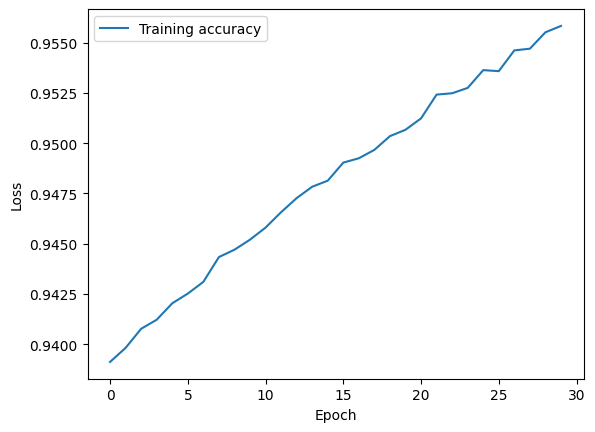

In [284]:
plt.plot(accuracy_list, label = "Training accuracy")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Simple Neural Network (but with auto-grad)

In [263]:
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms 

In [264]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)
        return x


In [265]:
#initialize the model, loss function, and optimizer
model = Net(input_size= 784, hidden_size1= 300, hidden_size2 = 200, num_classes = 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [307]:
#train model
total_step = len(train_loader)
train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
num_epochs = 30
for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    model.train() #sets the model to training mode. 
    ##new## 
    correct = 0
    total = 0
    ####
    for i, (images, labels) in enumerate(train_loader):
        #flatten the images
        images = images.reshape(-1, input_size)

        #forward pass 
        outputs = model(images)
        # _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        #backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track loss and accuracy 
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data,1)
        train_acc += (predicted == labels).sum().item()
    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)

    #evaluate the model
    model.eval() #to switch the model to evaluation mode.
    test_loss = 0
    test_acc = 0
    
    with torch.no_grad():
        correct = 0 
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = correct / total
        test_loss /= len(test_loader)
        test_accuracy_list.append(accuracy)
        test_loss_list.append(test_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Accuracy: {accuracy:.3f}")
        

Epoch 1/30, Accuracy: 0.297
Epoch 2/30, Accuracy: 0.302
Epoch 3/30, Accuracy: 0.302
Epoch 4/30, Accuracy: 0.303
Epoch 5/30, Accuracy: 0.303
Epoch 6/30, Accuracy: 0.303
Epoch 7/30, Accuracy: 0.304
Epoch 8/30, Accuracy: 0.303
Epoch 9/30, Accuracy: 0.303
Epoch 10/30, Accuracy: 0.315
Epoch 11/30, Accuracy: 0.326
Epoch 12/30, Accuracy: 0.332
Epoch 13/30, Accuracy: 0.339
Epoch 14/30, Accuracy: 0.345
Epoch 15/30, Accuracy: 0.347
Epoch 16/30, Accuracy: 0.350
Epoch 17/30, Accuracy: 0.354
Epoch 18/30, Accuracy: 0.361
Epoch 19/30, Accuracy: 0.373
Epoch 20/30, Accuracy: 0.375
Epoch 21/30, Accuracy: 0.386
Epoch 22/30, Accuracy: 0.391
Epoch 23/30, Accuracy: 0.391
Epoch 24/30, Accuracy: 0.402
Epoch 25/30, Accuracy: 0.404
Epoch 26/30, Accuracy: 0.438
Epoch 27/30, Accuracy: 0.479
Epoch 28/30, Accuracy: 0.509
Epoch 29/30, Accuracy: 0.523
Epoch 30/30, Accuracy: 0.530


In [269]:
# num epoch = 25, lr = 0.15, batch_size = 64, accuracy:76.03
# num epoch = 25, lr = 0.1, batch_size = 64, accuracy:74.89
# num epoch = 20, lr = 0.08, batch_size = 64, accuracy: 66.54
# num epoch = 20, lr = 0.15, batch_size = 32, accuracy: 
# num epoch = 20, lr = 0.1, batch_size = 32, accuracy: 
# num epoch = 20, lr = 0.07, batch_size = 32, accuracy: 75.57
# num epoch = 20, lr = 0.06, batch_size = 32, accuracy:
# num epoch = 25, lr = 0.15, batch_size = 32, accuracy: 
# num epoch = 25, lr = 0.1, batch_size = 32, accuracy: 76.56
# num epoch = 25, lr = 0.08, batch_size = 32, accuracy:
# num epoch = 25, lr = 0.05, batch_size = 32, accuracy: 75.24
# num epoch = 30, lr = 0.1, batch_size = 32, accuracy: 
# num epoch = 30, lr = 0.08, batch_size = 32, accuracy:
accuracy

0.7663

In [308]:
train_loss_list

[0.0681537585457166,
 0.06778660138646761,
 0.06751129845778148,
 0.0673099950671196,
 0.06714382131695748,
 0.06699611496329308,
 0.06686003215312958,
 0.06672964537938436,
 0.06660518991947174,
 0.06648182118535041,
 0.0663622233112653,
 0.06624838437636693,
 0.06614057221213976,
 0.066037209157149,
 0.06594190813302994,
 0.06584490361015002,
 0.06572933987776439,
 0.06554568734566371,
 0.06529465119838715,
 0.06506576986114183,
 0.06489492692351341,
 0.06476098898847898,
 0.06463732713063558,
 0.06448301603595416,
 0.0642281712770462,
 0.06378672858874003,
 0.06308726593255996,
 0.06220631433327993,
 0.06140929936170578,
 0.060920153218507765]

In [309]:
#test error 3.3
test_loss_list

[2.171360329985619,
 2.1606458028554916,
 2.1531363669633867,
 2.1473329726457595,
 2.1424308006763457,
 2.1379063234329223,
 2.133769835948944,
 2.129713780879974,
 2.125696943283081,
 2.1217977609634397,
 2.118167577624321,
 2.1144538198709486,
 2.1110450010299684,
 2.107961676836014,
 2.1048233822584153,
 2.101561978697777,
 2.0972188085317613,
 2.089689118146896,
 2.081590553045273,
 2.0753966324329376,
 2.070902435064316,
 2.0668712738752366,
 2.062642523288727,
 2.056297352910042,
 2.0453004879951475,
 2.026344986319542,
 2.000301266312599,
 1.9708440767526627,
 1.9499588726758956,
 1.9376523276567459]

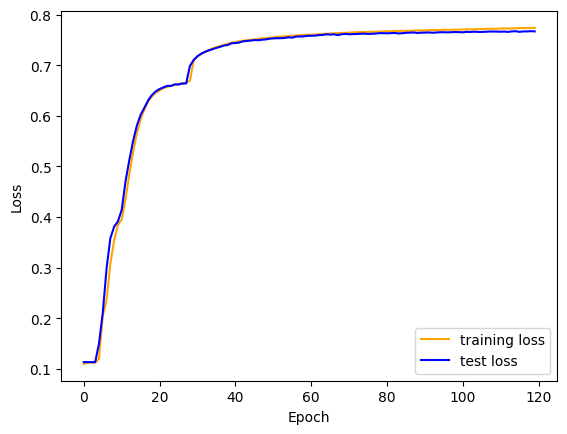

In [ ]:
plt.plot(train_accuracy_list, label = "training accuracy", color = 'orange')
plt.plot(test_accuracy_list, label = "test accuracy", color = 'blue')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Weight initialization 

In [310]:
class newNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(newNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

        # Initialize weights to zero
        nn.init.zeros_(self.fc1.weight)
        nn.init.zeros_(self.fc2.weight)
        nn.init.zeros_(self.fc3.weight)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)
        return x

In [311]:
# initialize the model, loss function, and optimizer
model = newNet(input_size= 784, hidden_size1= 300, hidden_size2 = 200, num_classes = 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.07)

# train model
total_step = len(train_loader)
train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
num_epochs = 30
for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    model.train() #sets the model to training mode. 
    ##new## 
    correct = 0
    total = 0
    ####
    for i, (images, labels) in enumerate(train_loader):
        #flatten the images
        images = images.reshape(-1, input_size)

        #forward pass 
        outputs = model(images)
        # _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        #backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track loss and accuracy 
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data,1)
        train_acc += (predicted == labels).sum().item()
    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)

    #evaluate the model
    model.eval() #to switch the model to evaluation mode.
    test_loss = 0
    test_acc = 0
    
    with torch.no_grad():
        correct = 0 
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = correct / total
        test_loss /= len(test_loader)
        test_accuracy_list.append(accuracy)
        test_loss_list.append(test_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Accuracy: {accuracy:.3f}")
        

Epoch 1/30, Accuracy: 0.114
Epoch 2/30, Accuracy: 0.103
Epoch 3/30, Accuracy: 0.114
Epoch 4/30, Accuracy: 0.114
Epoch 5/30, Accuracy: 0.114
Epoch 6/30, Accuracy: 0.114
Epoch 7/30, Accuracy: 0.114
Epoch 8/30, Accuracy: 0.114
Epoch 9/30, Accuracy: 0.114
Epoch 10/30, Accuracy: 0.114
Epoch 11/30, Accuracy: 0.114
Epoch 12/30, Accuracy: 0.114
Epoch 13/30, Accuracy: 0.114
Epoch 14/30, Accuracy: 0.114
Epoch 15/30, Accuracy: 0.114
Epoch 16/30, Accuracy: 0.103
Epoch 17/30, Accuracy: 0.114
Epoch 18/30, Accuracy: 0.114
Epoch 19/30, Accuracy: 0.114
Epoch 20/30, Accuracy: 0.114
Epoch 21/30, Accuracy: 0.114
Epoch 22/30, Accuracy: 0.114
Epoch 23/30, Accuracy: 0.114
Epoch 24/30, Accuracy: 0.167
Epoch 25/30, Accuracy: 0.210
Epoch 26/30, Accuracy: 0.211
Epoch 27/30, Accuracy: 0.211
Epoch 28/30, Accuracy: 0.223
Epoch 29/30, Accuracy: 0.248
Epoch 30/30, Accuracy: 0.274


In [290]:
accuracy

0.29

In [312]:
#test error 3.4.1
test_loss_list

[2.3011085743904114,
 2.301508157014847,
 2.3010996639728547,
 2.3012515923976897,
 2.301427635192871,
 2.301278203010559,
 2.3010810594558717,
 2.3010141096115113,
 2.301008359670639,
 2.30105476808548,
 2.3012630515098573,
 2.3011817615032197,
 2.3011775662899017,
 2.3010162863731383,
 2.301024555683136,
 2.3013415307998657,
 2.300874452829361,
 2.301227694988251,
 2.3005782628059386,
 2.3006676585674284,
 2.2999338841438295,
 2.297564957380295,
 2.2831777369976045,
 2.241751007795334,
 2.2208503737449647,
 2.211954819560051,
 2.206151433467865,
 2.2007382348775866,
 2.1941014851331713,
 2.18460772049427]

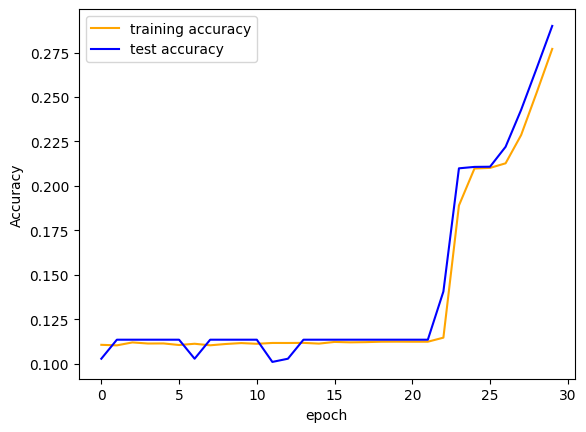

In [289]:
plt.plot(train_accuracy_list, label = "training accuracy", color = 'orange')
plt.plot(test_accuracy_list, label = "test accuracy", color = 'blue')
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
class RandNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(RandNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

        # Initialize weights to zero
        nn.init.uniform_(self.fc1.weight, -1, 1)
        nn.init.uniform_(self.fc2.weight, -1, 1)
        nn.init.uniform_(self.fc3.weight, -1, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)
        return x

In [323]:
#lr 0.8 num_epoch 50
#initialize the model, loss function, and optimizer
model = RandNet(input_size= 784, hidden_size1= 300, hidden_size2 = 200, num_classes = 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.08)

#train model
total_step = len(train_loader)
train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
num_epochs = 70
for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    model.train() #sets the model to training mode. 
    ##new## 
    correct = 0
    total = 0
    ####
    for i, (images, labels) in enumerate(train_loader):
        #flatten the images
        images = images.reshape(-1, input_size)

        #forward pass 
        outputs = model(images)
        # _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        #backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track loss and accuracy 
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data,1)
        train_acc += (predicted == labels).sum().item()
    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)

    #evaluate the model
    model.eval() #to switch the model to evaluation mode.
    test_loss = 0
    test_acc = 0
    
    with torch.no_grad():
        correct = 0 
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = correct / total
        test_loss /= len(test_loader)
        test_accuracy_list.append(accuracy)
        test_loss_list.append(test_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Accuracy: {accuracy:.3f}")

Epoch 1/70, Accuracy: 0.258
Epoch 2/70, Accuracy: 0.619
Epoch 3/70, Accuracy: 0.691
Epoch 4/70, Accuracy: 0.710
Epoch 5/70, Accuracy: 0.720
Epoch 6/70, Accuracy: 0.726
Epoch 7/70, Accuracy: 0.732
Epoch 8/70, Accuracy: 0.806
Epoch 9/70, Accuracy: 0.819
Epoch 10/70, Accuracy: 0.826
Epoch 11/70, Accuracy: 0.830
Epoch 12/70, Accuracy: 0.832
Epoch 13/70, Accuracy: 0.834
Epoch 14/70, Accuracy: 0.834
Epoch 15/70, Accuracy: 0.838
Epoch 16/70, Accuracy: 0.837
Epoch 17/70, Accuracy: 0.838
Epoch 18/70, Accuracy: 0.840
Epoch 19/70, Accuracy: 0.841
Epoch 20/70, Accuracy: 0.842
Epoch 21/70, Accuracy: 0.843
Epoch 22/70, Accuracy: 0.843
Epoch 23/70, Accuracy: 0.844
Epoch 24/70, Accuracy: 0.845
Epoch 25/70, Accuracy: 0.846
Epoch 26/70, Accuracy: 0.847
Epoch 27/70, Accuracy: 0.847
Epoch 28/70, Accuracy: 0.848
Epoch 29/70, Accuracy: 0.848
Epoch 30/70, Accuracy: 0.849
Epoch 31/70, Accuracy: 0.849
Epoch 32/70, Accuracy: 0.849
Epoch 33/70, Accuracy: 0.852
Epoch 34/70, Accuracy: 0.852
Epoch 35/70, Accuracy: 

In [324]:
train_accuracy_list

[0.18753333333333333,
 0.43711666666666665,
 0.6623666666666667,
 0.6976166666666667,
 0.7137166666666667,
 0.7223666666666667,
 0.7282166666666666,
 0.7638666666666667,
 0.8168833333333333,
 0.82635,
 0.83135,
 0.8351833333333334,
 0.8389833333333333,
 0.8418,
 0.8438833333333333,
 0.8465,
 0.8480833333333333,
 0.8495666666666667,
 0.8513333333333334,
 0.8529833333333333,
 0.8547166666666667,
 0.8557666666666667,
 0.8573833333333334,
 0.8585333333333334,
 0.8591833333333333,
 0.8602333333333333,
 0.8612666666666666,
 0.8615,
 0.8625666666666667,
 0.86285,
 0.8639,
 0.86495,
 0.8653166666666666,
 0.8661666666666666,
 0.8671,
 0.8676333333333334,
 0.86835,
 0.8690833333333333,
 0.8694833333333334,
 0.8700833333333333,
 0.87055,
 0.8713333333333333,
 0.8715333333333334,
 0.8721,
 0.8723333333333333,
 0.87265,
 0.87285,
 0.8733333333333333,
 0.8737333333333334,
 0.8740166666666667,
 0.8744,
 0.87485,
 0.8751333333333333,
 0.87565,
 0.8757833333333334,
 0.8762833333333333,
 0.8765333333333

In [325]:
#test error 3.4.2
test_loss_list

[2.19350365960598,
 1.8685298517942428,
 1.7799767243862152,
 1.7582505885362625,
 1.7478073945045471,
 1.739628409743309,
 1.7337576347589492,
 1.6660438293218613,
 1.6505689631700515,
 1.6437553255558013,
 1.6389983431100845,
 1.6360794985294342,
 1.6334604520797729,
 1.6310524557828903,
 1.629164080262184,
 1.6278377485275268,
 1.6259462051391602,
 1.6244034044742584,
 1.623663999080658,
 1.6223560507297516,
 1.6213625936508178,
 1.620270412683487,
 1.6195519176721573,
 1.6188058301210404,
 1.617730640053749,
 1.6170099918842316,
 1.6164047870635987,
 1.6158064341545104,
 1.6156597509384156,
 1.6143830214738846,
 1.6139306960105897,
 1.6137766407728196,
 1.6126828726530076,
 1.6126349076032638,
 1.611804547548294,
 1.6113160803318023,
 1.6109045660495758,
 1.610425487279892,
 1.610150103211403,
 1.609645964384079,
 1.6093914119005204,
 1.608877888441086,
 1.6085353345870972,
 1.6082109665870667,
 1.6079382640123367,
 1.6076195167303085,
 1.6073725744485856,
 1.6071265373229981,
 1.6

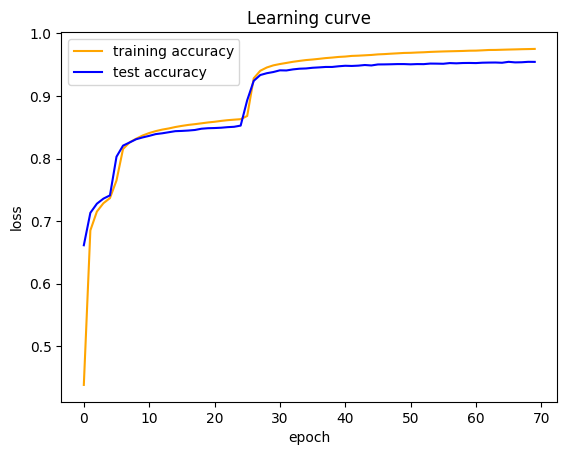

In [239]:
plt.plot(train_accuracy_list, label = "training accuracy", color = 'orange')
plt.plot(test_accuracy_list, label = "test accuracy", color = 'blue')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Learning curve")
plt.legend()
plt.show()